In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
df = pd.read_csv('RE_ Data Science Training Material/240304 Training Assignment Dataset.csv')

## Checking Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                378700 non-null  object 
 2   Age                   378590 non-null  float64
 3   Driving_License       377925 non-null  float64
 4   Region_Code           377876 non-null  float64
 5   Previously_Insured    377901 non-null  float64
 6   Vehicle_Age           377651 non-null  object 
 7   Vehicle_Damage        377833 non-null  object 
 8   Annual_Premium        377943 non-null  float64
 9   Policy_Sales_Channel  379154 non-null  float64
 10  Vintage               381014 non-null  float64
 11  Response              381109 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,378590.00000,377925.000000,377876.000000,377901.000000,377943.000000,379154.000000,381014.000000,381109.000000
mean,190555.000000,38.81855,0.997867,26.393619,0.458178,30563.769928,112.040878,154.344021,0.122563
std,110016.836208,15.50903,0.046132,13.230413,0.498249,17216.943211,54.200731,83.672192,0.327936
min,1.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.00000,1.000000,15.000000,0.000000,24406.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.00000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.00000,1.000000,35.000000,1.000000,39397.000000,152.000000,227.000000,0.000000
max,381109.000000,85.00000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## light exploring data

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0
4,5,Female,29.0,NaN,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0


In [6]:
# Label encoding with NaN preservation
label_encoded_vehicle_age = df['Vehicle_Age'].astype('category').cat.codes
label_encoded_vehicle_damage = df['Vehicle_Damage'].astype('category').cat.codes
label_encoded_gender = df['Gender'].astype('category').cat.codes

# Add label encoded columns to the DataFrame
df['Label_Encoded_Vehicle_Age'] = label_encoded_vehicle_age.replace(-1, np.nan)
df['Label_Encoded_Vehicle_Damage'] = label_encoded_vehicle_damage.replace(-1, np.nan)
df['Label_Encoded_Gender'] = label_encoded_gender.replace(-1, np.nan)


df['Label_Encoded_Vehicle_Age'] = df['Label_Encoded_Vehicle_Age'].astype(float)
df['Label_Encoded_Vehicle_Damage'] = df['Label_Encoded_Vehicle_Damage'].astype(float)
df['Label_Encoded_Gender'] = df['Label_Encoded_Gender'].astype(float)

#### Numeric Columns

In [7]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'Label_Encoded_Vehicle_Age', 'Label_Encoded_Vehicle_Damage',
       'Label_Encoded_Gender'],
      dtype='object')

In [8]:
numeric_columns = df.select_dtypes(include=['number'])

In [9]:
numeric_columns = numeric_columns[['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 
       'Label_Encoded_Vehicle_Age', 'Label_Encoded_Vehicle_Damage',
       'Label_Encoded_Gender','Response']]

### Corr

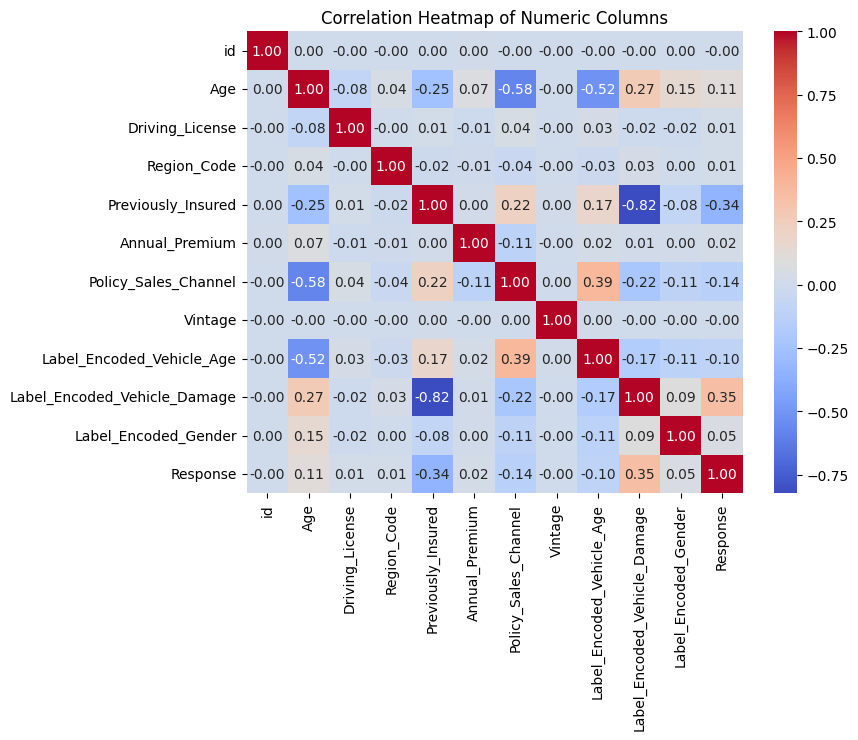

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

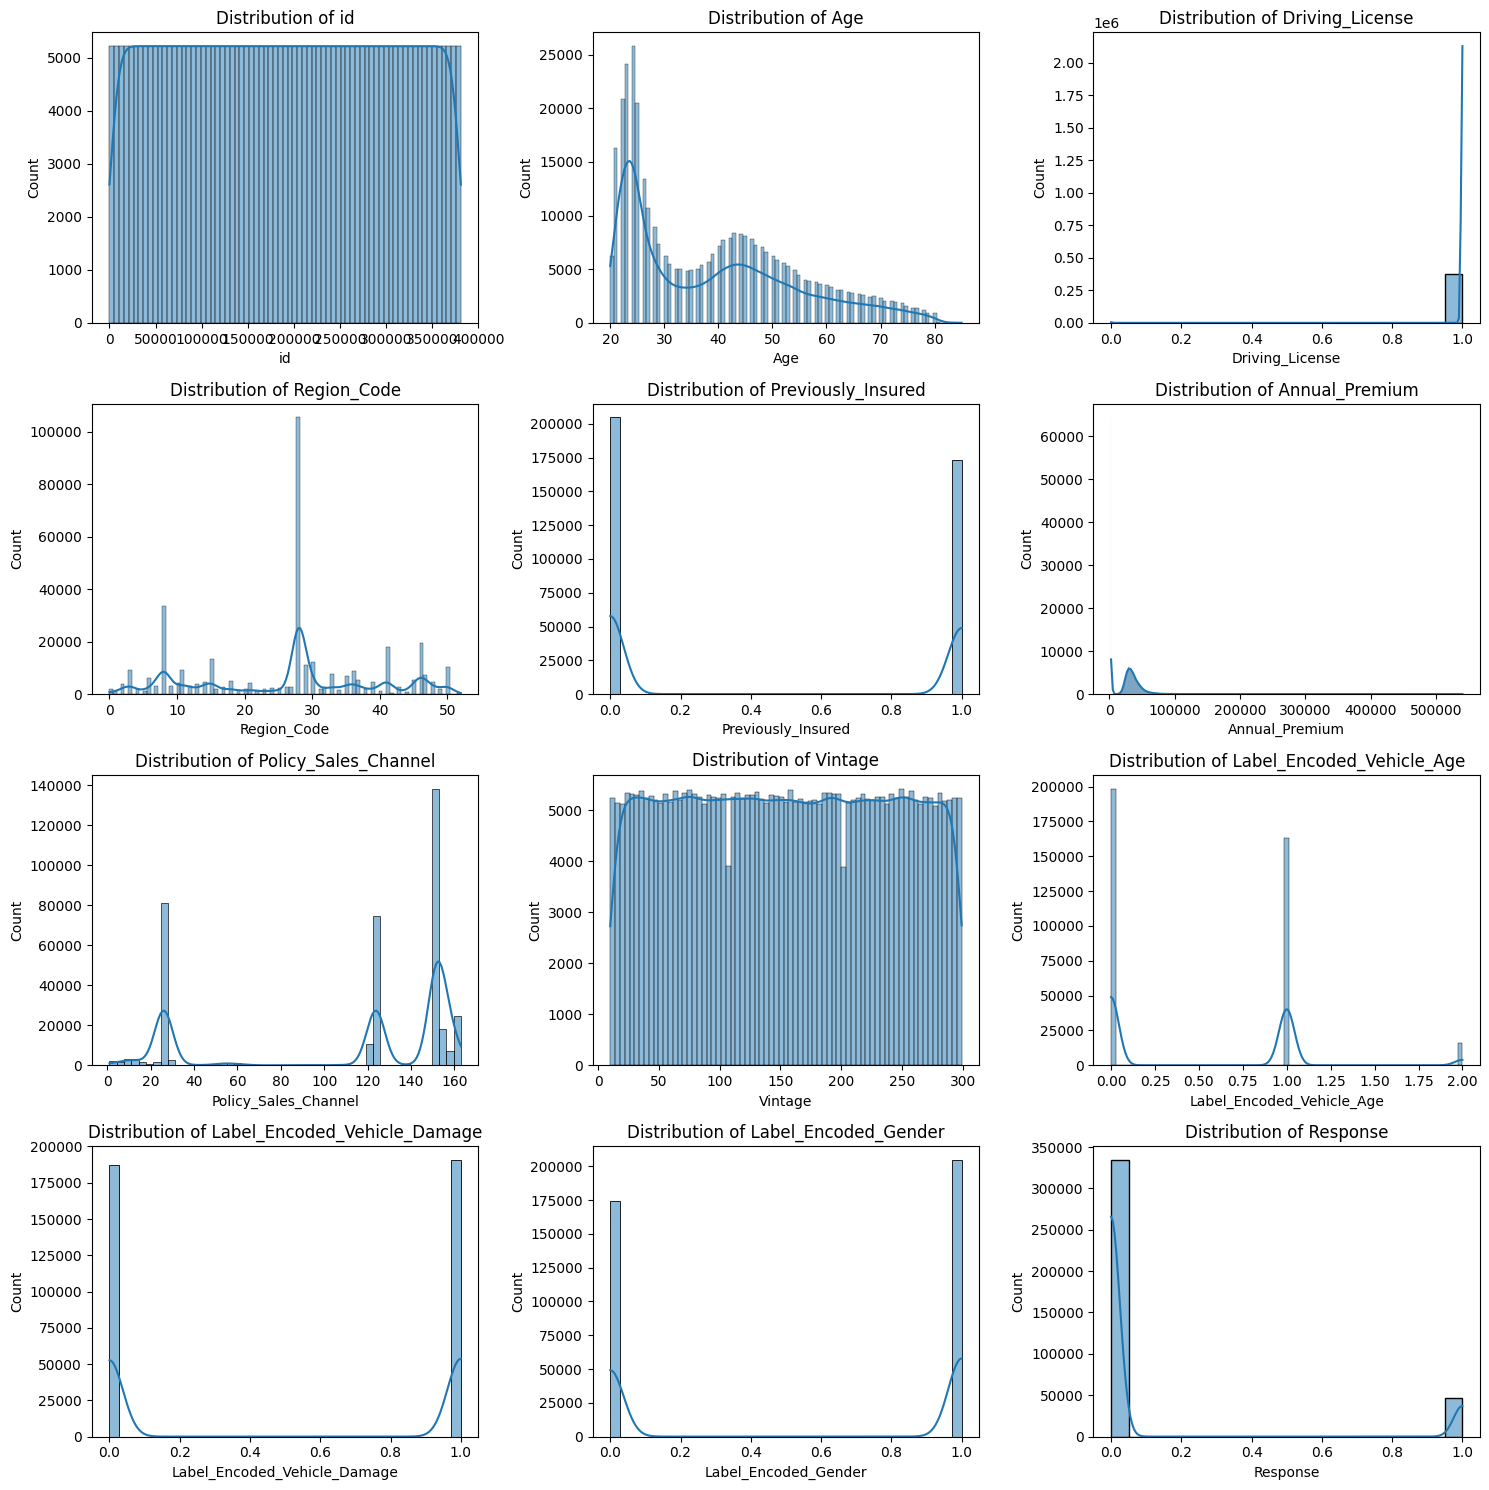

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot its distribution on a subplot
for i, column in enumerate(numeric_columns.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

## Histogram

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Driving_License'}>],
       [<Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Previously_Insured'}>,
        <Axes: title={'center': 'Annual_Premium'}>],
       [<Axes: title={'center': 'Policy_Sales_Channel'}>,
        <Axes: title={'center': 'Vintage'}>,
        <Axes: title={'center': 'Response'}>],
       [<Axes: title={'center': 'Label_Encoded_Vehicle_Age'}>,
        <Axes: title={'center': 'Label_Encoded_Vehicle_Damage'}>,
        <Axes: title={'center': 'Label_Encoded_Gender'}>]], dtype=object)

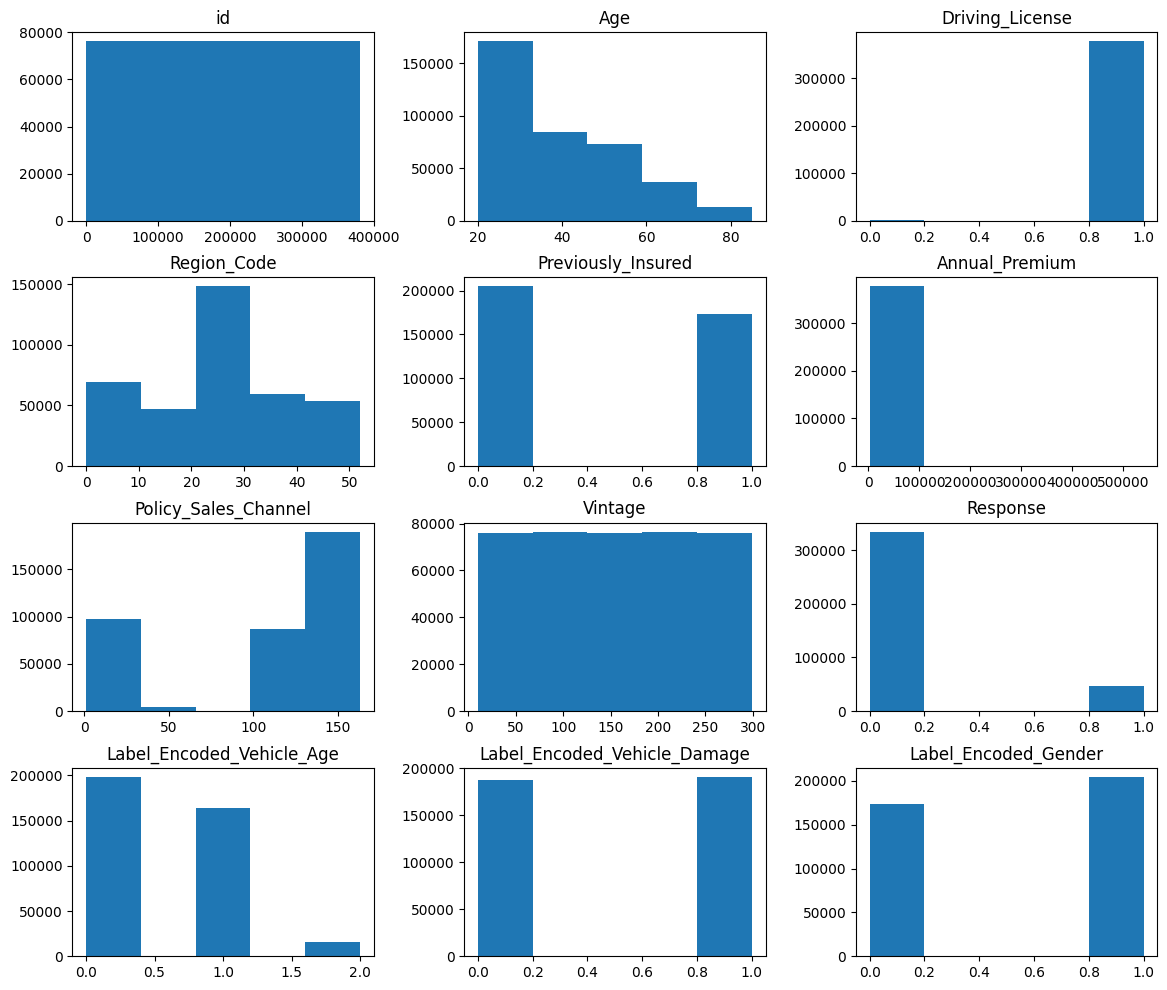

In [12]:
df.hist(bins=5, grid=False, figsize=(14, 12))

## Checking null values 

In [13]:
df.isnull().sum()

id                                 0
Gender                          2409
Age                             2519
Driving_License                 3184
Region_Code                     3233
Previously_Insured              3208
Vehicle_Age                     3458
Vehicle_Damage                  3276
Annual_Premium                  3166
Policy_Sales_Channel            1955
Vintage                           95
Response                           0
Label_Encoded_Vehicle_Age       3458
Label_Encoded_Vehicle_Damage    3276
Label_Encoded_Gender            2409
dtype: int64

In [14]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

### Ratio before Droping NaN 

In [15]:
ration_1_to_0_before = df['Response'].value_counts()[1] / df['Response'].value_counts()[0]
ration_1_to_0_before

0.13968343206767964

In [16]:
df.dropna().isnull().sum()

id                              0
Gender                          0
Age                             0
Driving_License                 0
Region_Code                     0
Previously_Insured              0
Vehicle_Age                     0
Vehicle_Damage                  0
Annual_Premium                  0
Policy_Sales_Channel            0
Vintage                         0
Response                        0
Label_Encoded_Vehicle_Age       0
Label_Encoded_Vehicle_Damage    0
Label_Encoded_Gender            0
dtype: int64

In [17]:
df.dropna()['Response'].value_counts()

Response
0    330799
1     46199
Name: count, dtype: int64

### Ratio after Droping NaN 

In [18]:
ration_1_to_0_after = df.dropna()['Response'].value_counts()[1] / df.dropna()['Response'].value_counts()[0]
ration_1_to_0_after

0.1396588260544923

In [19]:
#diffrence figure 

ration_1_to_0_before - ration_1_to_0_after 

2.4606013187322695e-05

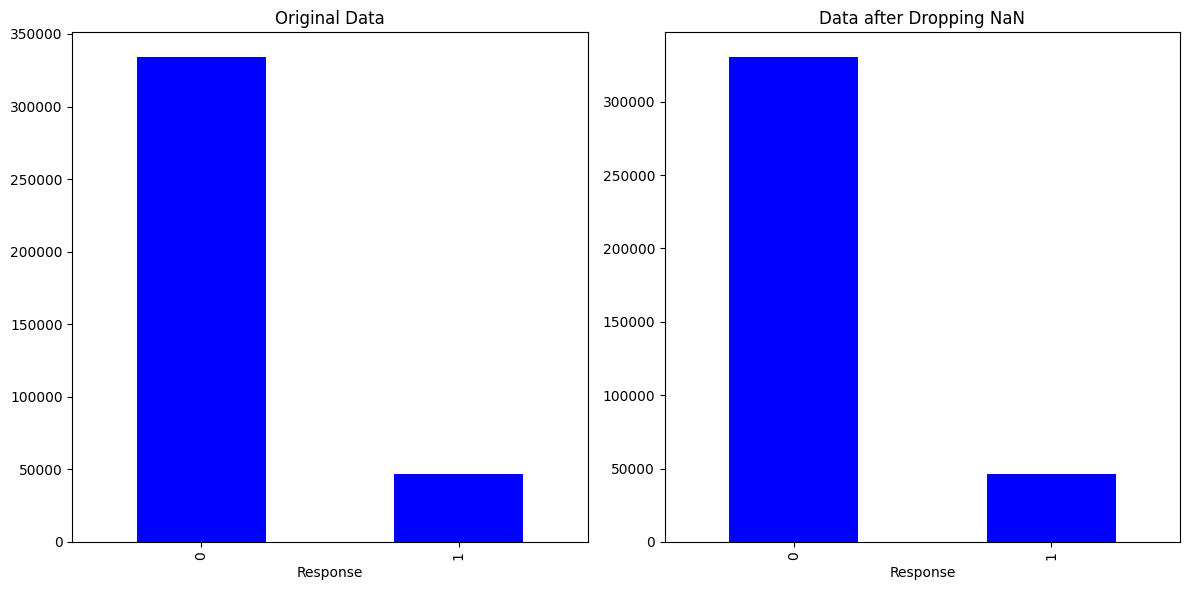

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first chart
df['Response'].value_counts().plot(kind='bar', color='blue', ax=axs[0])
axs[0].set_title('Original Data')

# Plotting the second chart
df.dropna()['Response'].value_counts().plot(kind='bar', color='blue', ax=axs[1])
axs[1].set_title('Data after Dropping NaN')

plt.tight_layout()
plt.show()

## <font color = 'red'> We Can See that after droping we are not loosing much data

In [21]:
df.dropna(inplace=True)

In [22]:
numeric_columns = df.select_dtypes(include=['number'])

#### ploting distro after removing null

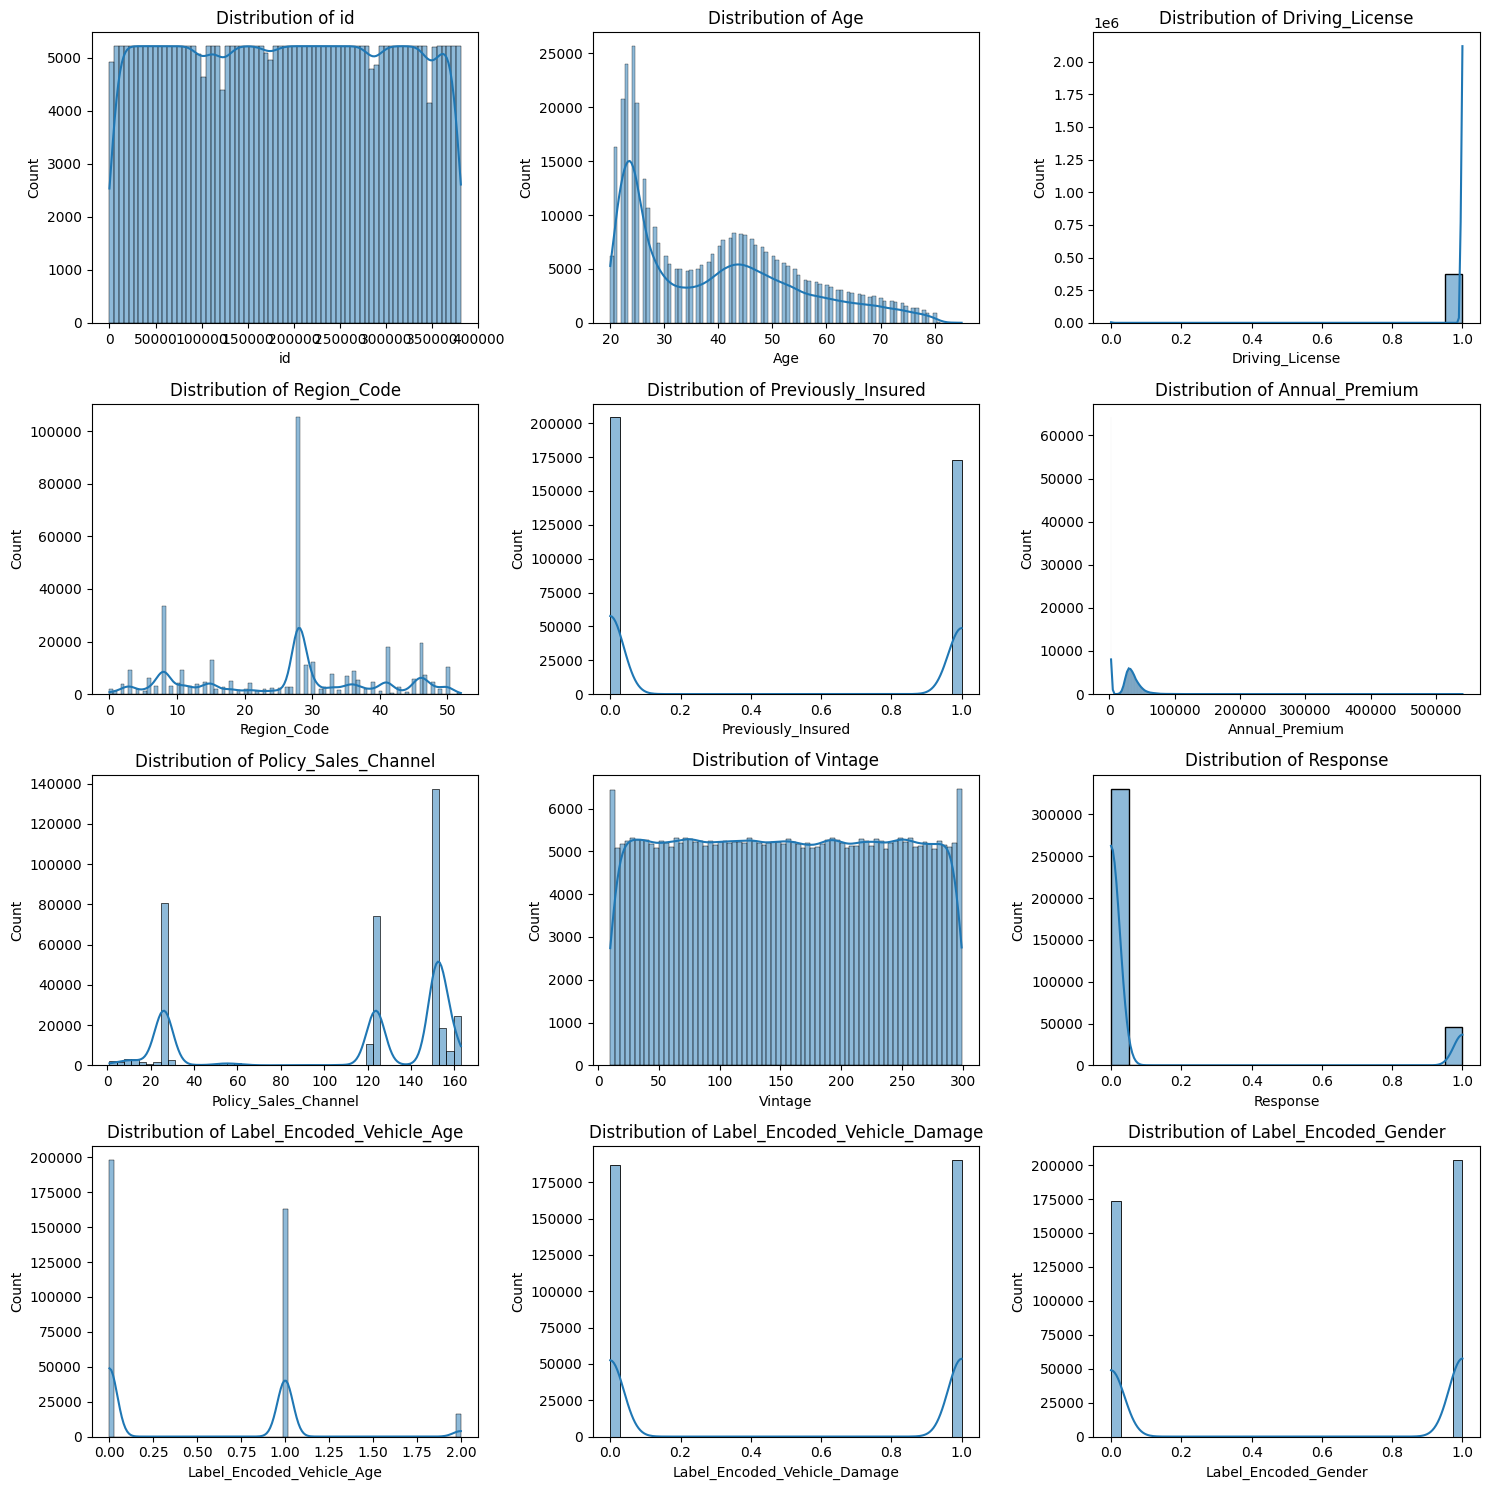

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot its distribution on a subplot
for i, column in enumerate(numeric_columns.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

#### <font color = 'red'> We dont see any drastic changes 

# Outliers Imputing

In [24]:
len(numeric_columns.columns)

12

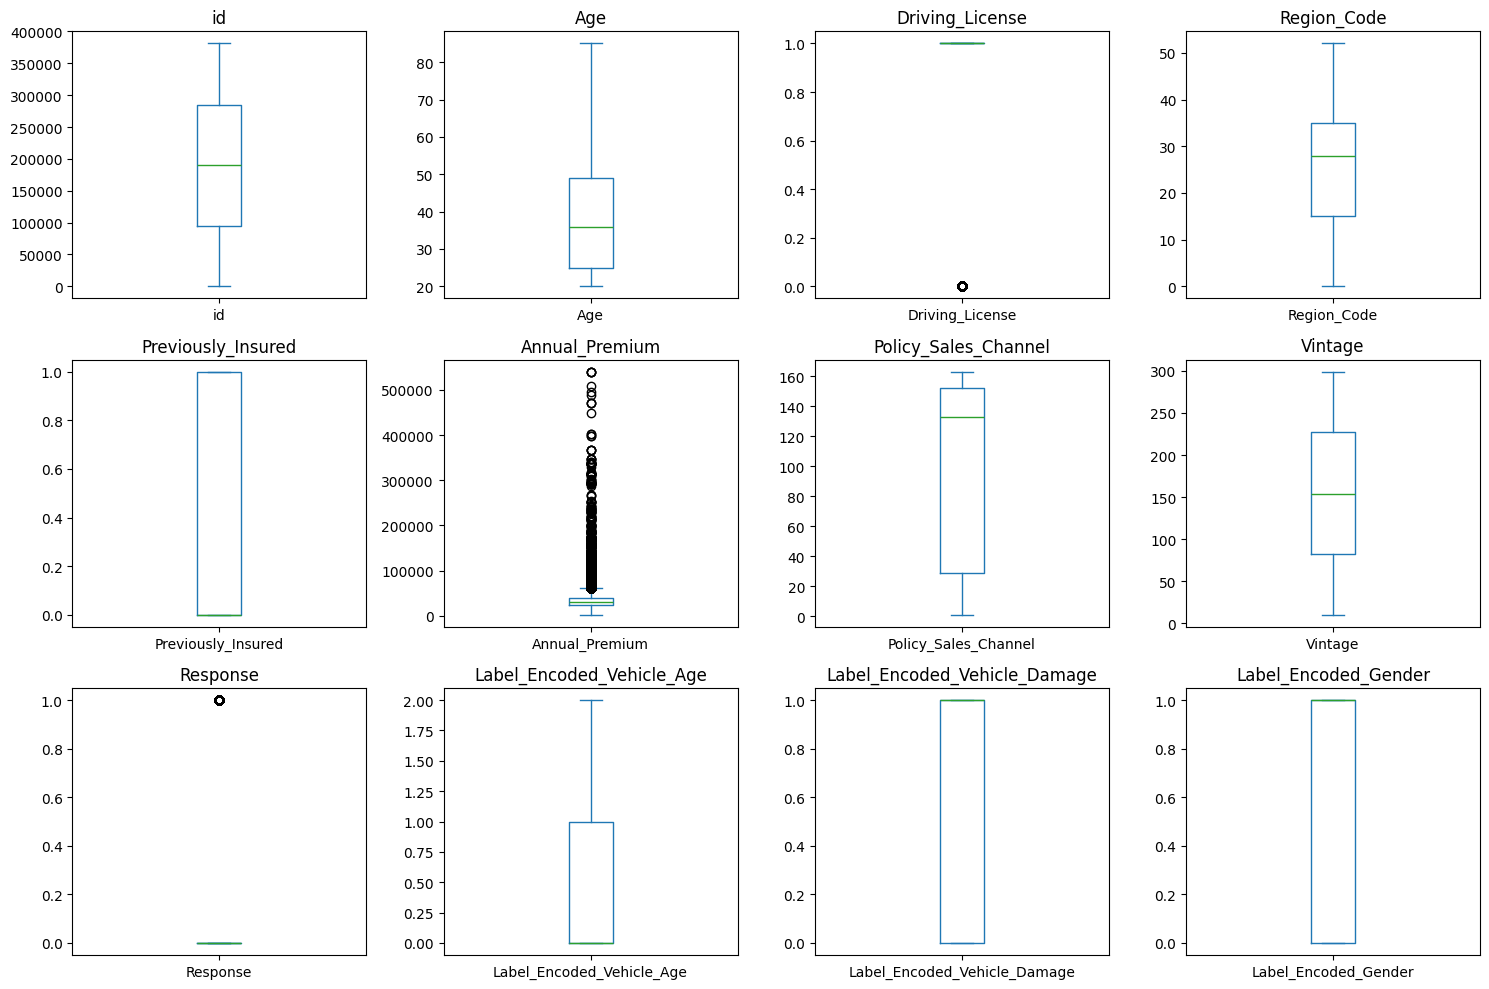

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over numeric columns and plot boxplots
for i, column in enumerate(numeric_columns.columns):
    numeric_columns[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [26]:
df['Annual_Premium'].value_counts()

Annual_Premium
2630.0     64173
69856.0      139
39008.0       41
45179.0       38
38287.0       38
           ...  
13853.0        1
20452.0        1
77727.0        1
67718.0        1
69845.0        1
Name: count, Length: 48710, dtype: int64

In [27]:
categorical_cols = []

for i in df.columns:
    print(i , df[i].nunique())
    if df[i].nunique() < 10:
        categorical_cols.append(i)

id 376998
Gender 2
Age 66
Driving_License 2
Region_Code 53
Previously_Insured 2
Vehicle_Age 3
Vehicle_Damage 2
Annual_Premium 48710
Policy_Sales_Channel 155
Vintage 290
Response 2
Label_Encoded_Vehicle_Age 3
Label_Encoded_Vehicle_Damage 2
Label_Encoded_Gender 2


In [28]:
len(categorical_cols)

9

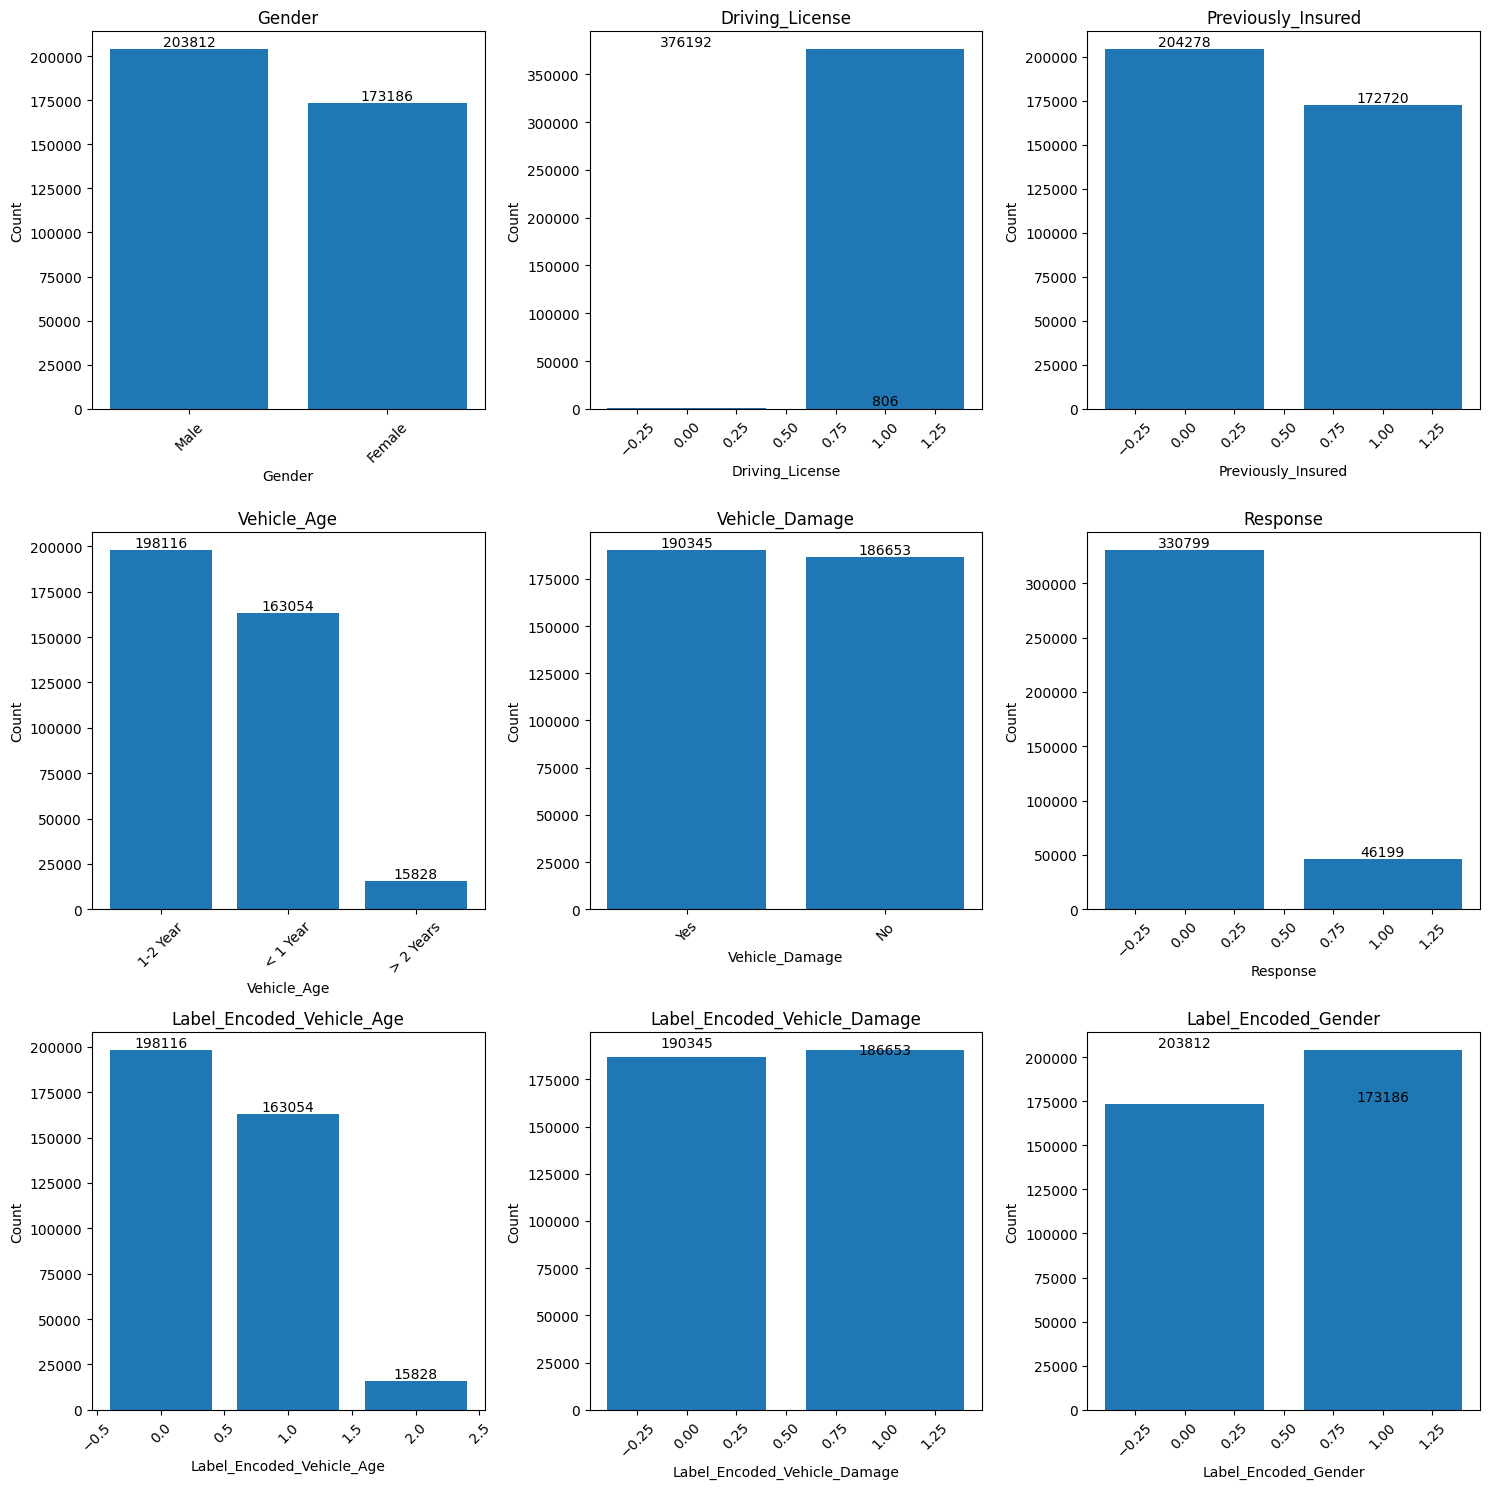

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust figsize as needed

for i, ax in enumerate(axes.flatten()):
    if i < len(categorical_cols):
        col = categorical_cols[i]
        value_counts = df[col].value_counts()
        ax.bar(value_counts.index, value_counts.values)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-labels for better visibility if needed

        for j, count in enumerate(value_counts):
            ax.text(j, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def fix_outliers_iqr(data, k=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    
    # Identify outliers
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    
    # Fix outliers
    fixed_data = np.copy(data)
    fixed_data[outliers] = np.median(data)  # Replace outliers with median
    
    return fixed_data


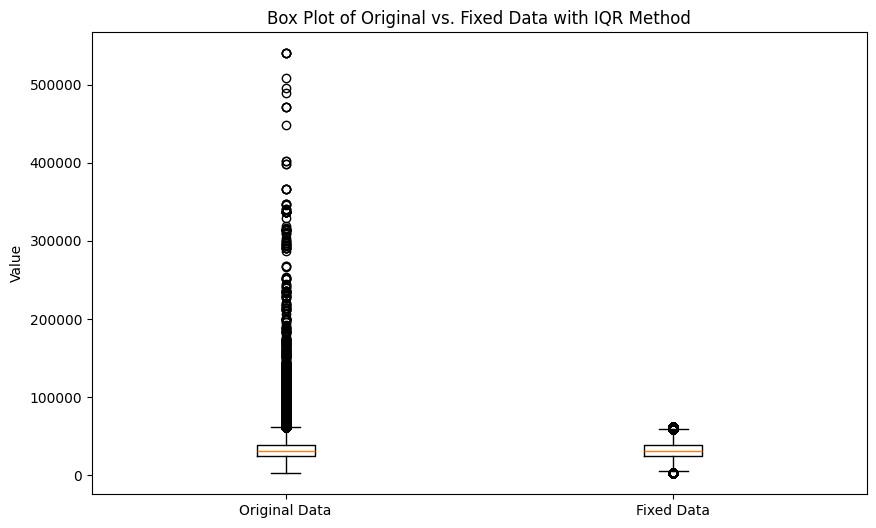

In [31]:
data = df['Annual_Premium']

# Fix outliers using the IQR method
fixed_data = fix_outliers_iqr(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot([data, fixed_data], labels=['Original Data', 'Fixed Data'])
plt.ylabel('Value')
plt.title('Box Plot of Original vs. Fixed Data with IQR Method')
plt.show()


In [32]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Label_Encoded_Vehicle_Age,Label_Encoded_Vehicle_Damage,Label_Encoded_Gender
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1,2.0,1.0,1.0
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0,0.0,0.0,1.0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1,2.0,1.0,1.0
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0,1.0,0.0,1.0
15,16,Male,37.0,1.0,6.0,0.0,1-2 Year,Yes,2630.0,156.0,147.0,1,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0,0.0,0.0,1.0
381105,381106,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0,1.0,0.0,1.0
381106,381107,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0,1.0,0.0,1.0
381107,381108,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0,2.0,1.0,0.0


## Feature Enginnering

In [33]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'Label_Encoded_Vehicle_Age', 'Label_Encoded_Vehicle_Damage',
       'Label_Encoded_Gender'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

# Define the columns you want to encode
columns_to_encode = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

label_encoder = LabelEncoder()

# Initialize dictionaries to store mappings
mappings = {}

# Perform label encoding and store mappings for specified columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Save mappings to files
for column, mapping in mappings.items():
    with open(f'{column}_mapping.txt', 'w') as f:
        f.write(str(mapping))

# Display the mappings
for column, mapping in mappings.items():
    print(f"{column} Mapping:", mapping)

# Display the updated DataFrame
print("\nUpdated DataFrame:")



Gender Mapping: {'Female': 0, 'Male': 1}
Vehicle_Age Mapping: {'1-2 Year': 0, '< 1 Year': 1, '> 2 Years': 2}
Vehicle_Damage Mapping: {'No': 0, 'Yes': 1}

Updated DataFrame:


In [35]:
df = df[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']]

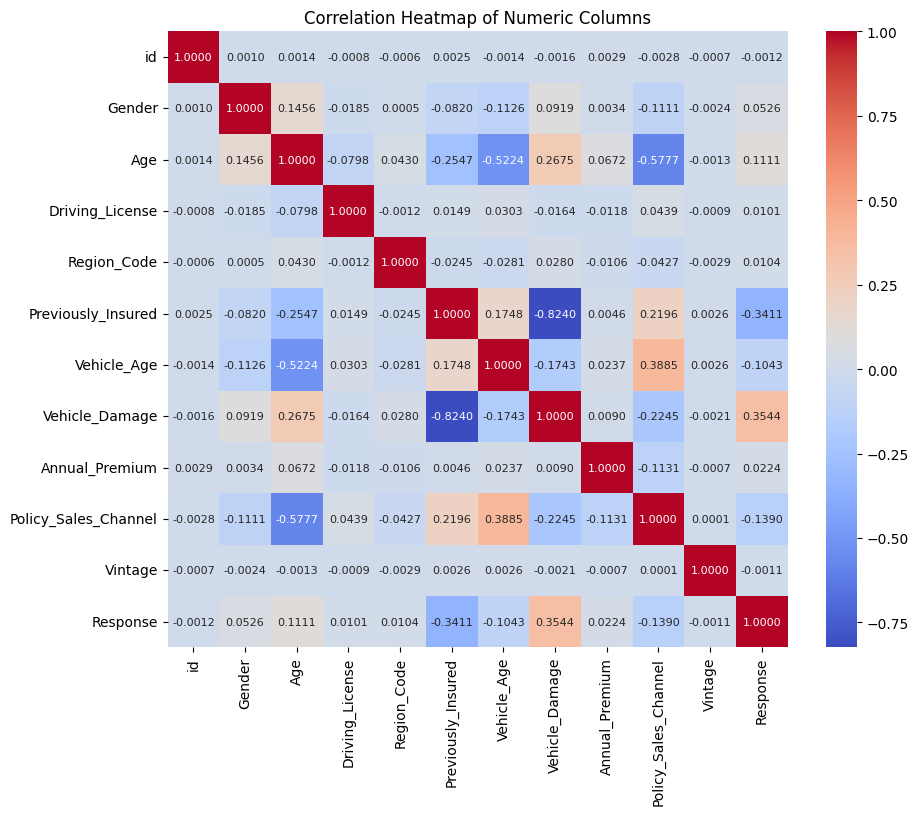

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f", annot_kws={"size": 8})
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [37]:
len(df.columns)

12

### Non-Linear Co-relation metrics

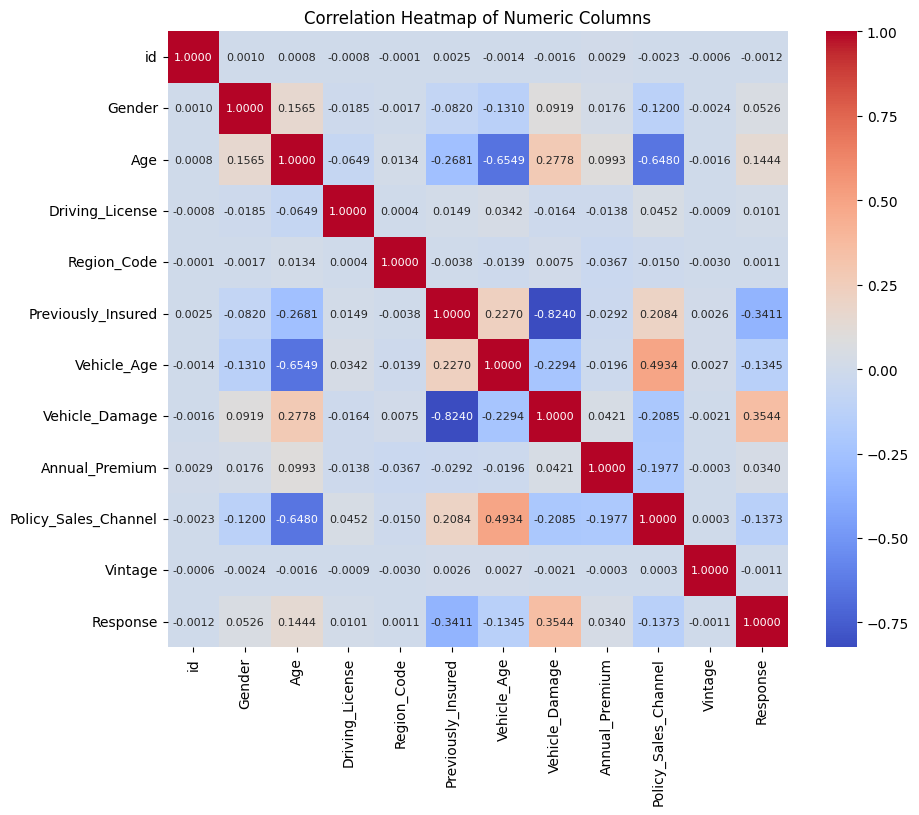

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".4f", annot_kws={"size": 8})
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

### Seeing Diffrence 

In [43]:
df.corr()['Response']

id                     -0.001243
Gender                  0.052623
Age                     0.111130
Driving_License         0.010118
Region_Code             0.010429
Previously_Insured     -0.341084
Vehicle_Age            -0.104276
Vehicle_Damage          0.354358
Annual_Premium          0.022435
Policy_Sales_Channel   -0.139047
Vintage                -0.001078
Response                1.000000
Name: Response, dtype: float64

In [44]:
df.corr(method='spearman')['Response']

id                     -0.001238
Gender                  0.052623
Age                     0.144370
Driving_License         0.010118
Region_Code             0.001075
Previously_Insured     -0.341084
Vehicle_Age            -0.134461
Vehicle_Damage          0.354358
Annual_Premium          0.034023
Policy_Sales_Channel   -0.137272
Vintage                -0.001079
Response                1.000000
Name: Response, dtype: float64

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('Response', axis=1)  # Features
y = df['Response']  # Target variable


selector = SelectKBest(score_func=chi2, k=11)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support(indices=True)]

# Get the scores of selected features
feature_scores = selector.scores_[selector.get_support(indices=True)]

# Create a DataFrame to display selected features along with their scores
result_df = pd.DataFrame({'Feature': selected_features, 'Chi-Squared Score': feature_scores})

# Sort features by their chi-squared scores
result_df = result_df.sort_values(by='Chi-Squared Score', ascending=False)

# Reset index for better visualization
result_df.reset_index(drop=True, inplace=True)

# Display selected features along with their scores
print("Selected Features with Chi-Squared Scores:")
print(result_df)

Selected Features with Chi-Squared Scores:
                 Feature  Chi-Squared Score
0         Annual_Premium       1.840415e+06
1   Policy_Sales_Channel       1.911128e+05
2                     id       3.697068e+04
3                    Age       2.884471e+04
4     Previously_Insured       2.376535e+04
5         Vehicle_Damage       2.343790e+04
6            Vehicle_Age       2.648572e+03
7                 Gender       4.795916e+02
8            Region_Code       2.719587e+02
9                Vintage       1.985279e+01
10       Driving_License       8.250657e-02


In [60]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'